# Red Wine Quality Prediction

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

# Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Attributes Contributing to the Quality of wine

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

# Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
df=pd.read_csv('Winequality.red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


To find shape and type of the dataset

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.shape

(1599, 12)

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Check For null values

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

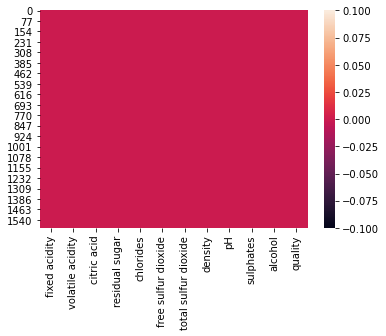

In [10]:
sns.heatmap(df.isnull())
plt.show()

Check The dependent variable

In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

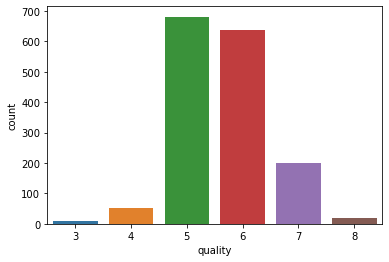

In [11]:
sns.countplot(df['quality'])

There seems to be high number of wines with quality 5 and 6. 
there are very less number of wine with highest quality

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The mean values are higher than median in total sulphur dioxide, free sulphur dioxide, 
it shows that there are skewness in the data.

There seeme to be a large gap between 75th percentile and maximum values in fixed acidity,
residual sugar, free sulphur dioxide, total sulphur dioxide, alcohol column, which shows there are outliers present in the dataset

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

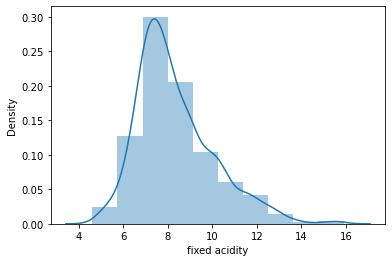

In [28]:
sns.distplot(df['fixed acidity'],bins=10)

Fixed Acidity is distributed within 7 to 9

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

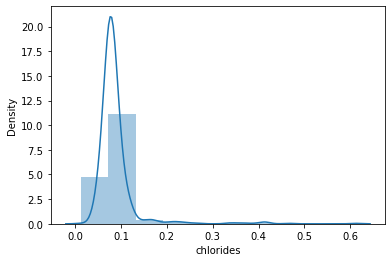

In [36]:
sns.distplot(df['chlorides'],bins=10)

Chlorides are distributed within 0.05 to 0.15

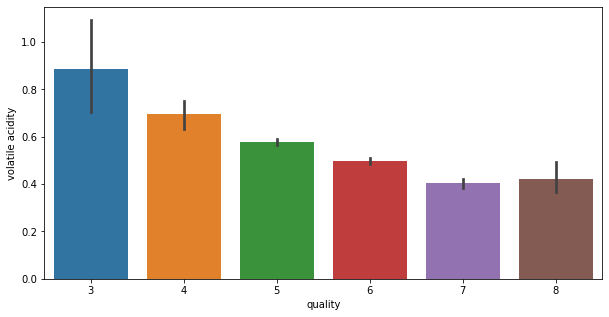

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='volatile acidity', data=df)
plt.show()

If volatile acidity increases, the quality of the wine decreases.
Volatile acidity is inversly proportional to quality. 

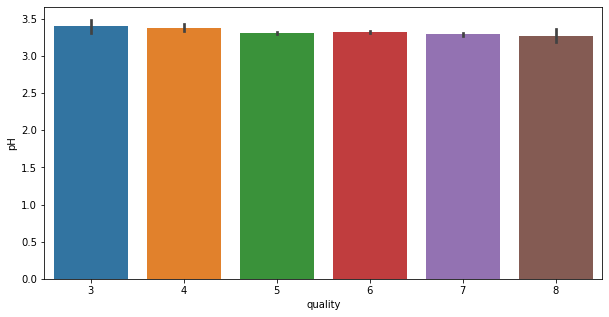

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='pH', data=df)
plt.show()

For the wine to be of good quality, pH should be within 3.25 to 3.5 

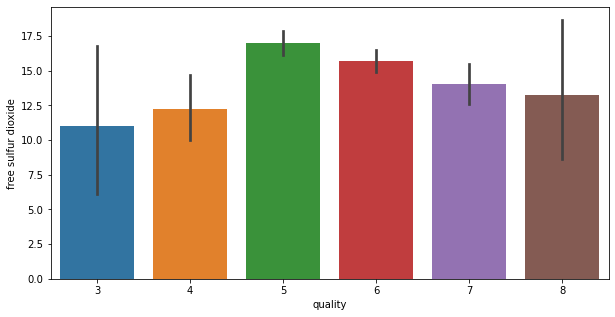

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='free sulfur dioxide', data=df)
plt.show()

For the wine quality to be good, free sulphor dioxide to be from 13 to 13.5

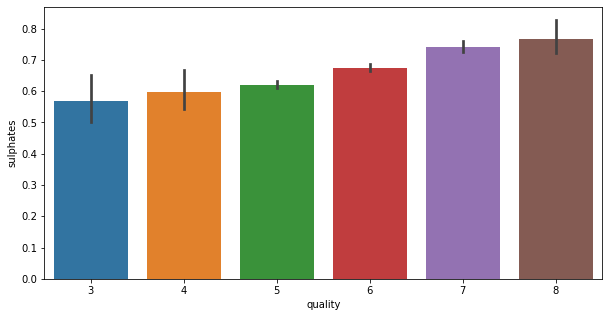

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='sulphates', data=df)
plt.show()

Sulphates should be high for the wine to be of good quality

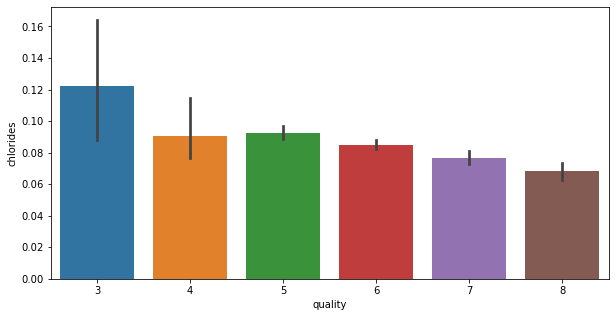

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='chlorides', data=df)
plt.show()

If chlorides are high then the quality of the wine decreases. For the wine to be good quality, chlorides should be within 0.06 to 0.07

# To Find Correlation

In [38]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

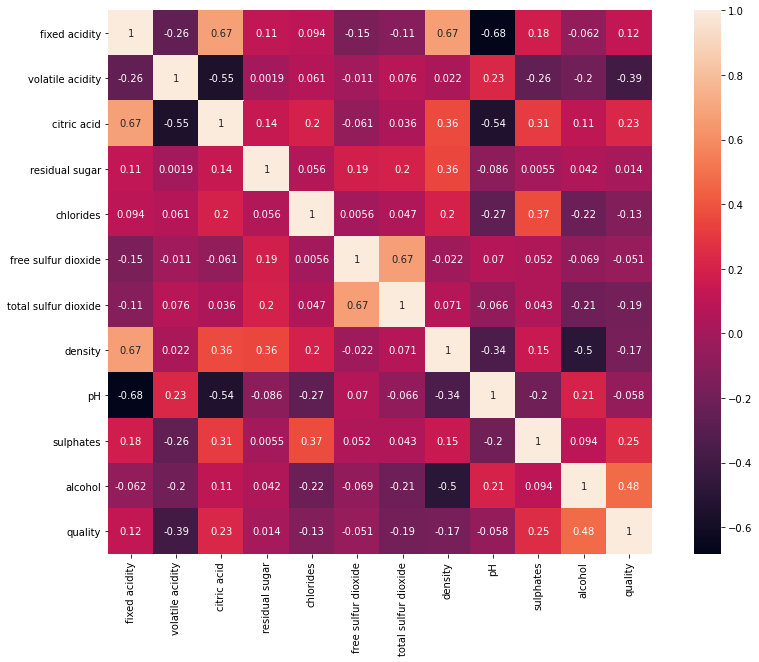

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,square=True)

# Correlation Outcome

Free Sulphor dioxide and Total sulphor dioxide are correlated to each other.

Alcohol, Sulphates, Residual sugar, citric acid and fixed acidity are positively correlated to quality,
where as other components are negatively correlated

# VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
df1=df.iloc[:,0:-1]
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [47]:
df1.shape

(1599, 11)

In [48]:
df1.shape[1]

11

In [49]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [50]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [51]:
vif_fun()

,vif_factor,features
0,74.452265,fixed acidity
1,17.060026,volatile acidity
2,9.183495,citric acid
3,4.662992,residual sugar
4,6.554877,chlorides
5,6.442682,free sulfur dioxide
6,6.519699,total sulfur dioxide
7,1479.287209,density
8,1070.967685,pH
9,21.590621,sulphates


pH and Density has high VIF factor.
pH contributes little higher to the quality than Density. 
So we will drop density column

# Drop The columns with collinearity

In [53]:
df.drop(['density'], axis=1, inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,5


In [54]:
df1=df.iloc[:,0:-1]

In [55]:
df1.shape

(1599, 10)

In [56]:
vif_fun()

,vif_factor,features
0,40.216574,fixed acidity
1,17.058940,volatile acidity
2,9.149028,citric acid
3,4.662789,residual sugar
4,6.017799,chlorides
5,6.390157,free sulfur dioxide
6,6.096300,total sulfur dioxide
7,158.025734,pH
8,21.552410,sulphates
9,121.980842,alcohol


# Check For Skewness

In [57]:
df1.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
dtype: float64

Chlorides and residual sugar has high skewness. Remove it with power transform method.

In [60]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [61]:
df1=pd.DataFrame(df1_new, columns= df1.columns)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,0.718869,0.820841,0.734558
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,1.638595,0.588344,-0.018800


In [62]:
df1.skew().sort_values(ascending=False)

alcohol                 0.112372
citric acid             0.017788
sulphates               0.009985
volatile acidity        0.003099
fixed acidity           0.002529
pH                     -0.002823
total sulfur dioxide   -0.003752
free sulfur dioxide    -0.009948
residual sugar         -0.015715
chlorides              -0.151304
dtype: float64

In [64]:
sk_data=df1.skew()
sk_data

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

In [65]:
df1.skew()[np.abs(df1.skew())<0.25].all()

True

In [105]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1= sc.fit_transform(df1)
df1

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568965e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129874e+00, -1.53110932e+00, ...,
        -7.09517433e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054073e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87059824e-04, -6.83293826e-01, ...,
         7.18868617e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552768e-01, -7.43826364e-01, ...,
         1.63859528e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831617e-01,  2.56369273e-01,  7.34557526e-01]])

Skewness is removed 

# Checking For Outliers

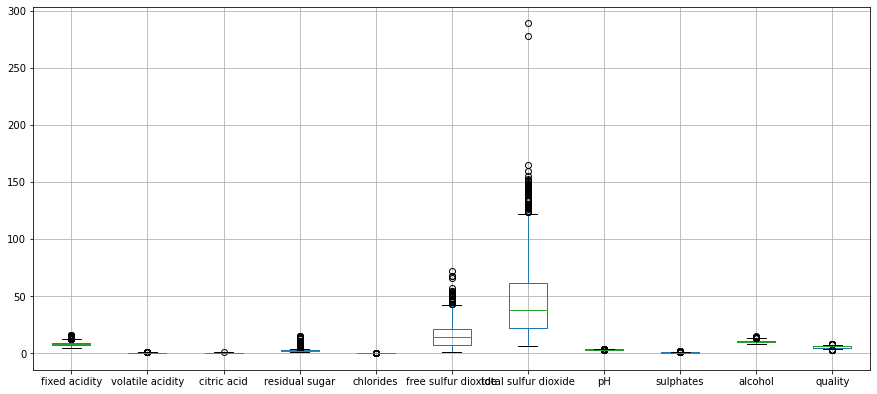

In [70]:
df.boxplot(figsize=(15,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

Some outliers are present in each columns.

In [71]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [72]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  451,  459,
        467,  480,  494,  515,  517,  544,  554,  555,  557,  568,  584,
        588,  591,  595,  614,  636,  639,  649,  649,  651,  652,  652,
        652,  672,  672,  684,  690,  690,  692,  692,  695,  723,  724,
        730,  754,  776,  777,  795,  821,  832,  899,  911,  917,  923,
        925,  926,  982, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244, 1244,
       1244, 1260, 1269, 1270, 1288, 1289, 1295, 1296, 1299, 1299, 1300,
       1312, 1316, 1319, 1319, 1321, 1358, 1367, 1

In [73]:
z[13][8]

5.32210116796055

In [74]:
df_new= df[(z<3).all(axis=1)]

In [75]:
df_new.shape

(1458, 11)

In [76]:
df.shape

(1599, 11)

Percentage loss

In [77]:
loss_percent= (1599-1458)/1599*100
loss_percent

8.818011257035648

# Spliting the data and Balancing 

In [84]:
x= df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]


In [79]:
from imblearn.over_sampling import SMOTE

In [88]:
sm=SMOTE()
x1,y1= sm.fit_resample(x,y)
y1

0       5
1       5
2       5
3       6
4       5
       ..
3085    8
3086    8
3087    8
3088    8
3089    8
Name: quality, Length: 3090, dtype: int64

In [89]:
y1.value_counts()

4    618
6    618
8    618
5    618
7    618
Name: quality, dtype: int64

Since the Target variable is categorical with more than 2 classes, we use classification models to train our data

# Training The Model

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# TO Find Best Random State

MultinomialNB

In [93]:
maxAcc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=i)
    mnb=MultinomialNB()
    mnb.fit(xtrain,ytrain)
    predmnb= mnb.predict(xtest)
    acc= accuracy_score(ytest,predmnb)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 0.55 on Random_state 17


DecisionTreeClassifier

In [96]:
maxAcc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(xtrain,ytrain)
    preddtc= dtc.predict(xtest)
    acc= accuracy_score(ytest,preddtc)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 0.95 on Random_state 23


RandomForestClassifier

In [97]:
maxAcc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(xtrain,ytrain)
    predrf=rf.predict(xtest)
    acc= accuracy_score(ytest,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 1.0 on Random_state 17


From the above results, KNeighborsClassifier, RandomForestClassifier, SVC has highest accuracy

Check Accuracy of each model

In [99]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=20, random_state=17)

MultinomialNB

In [100]:
mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)
predmnb= mnb.predict(xtest)
print('acc=', accuracy_score(ytest,predmnb))
print(confusion_matrix(ytest,predmnb))
print(classification_report(ytest,predmnb))

acc= 0.55
[[0 0 0 0 0]
 [1 2 1 0 0]
 [0 0 2 0 2]
 [0 0 3 0 1]
 [0 1 0 0 7]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.67      0.50      0.57         4
           6       0.33      0.50      0.40         4
           7       0.00      0.00      0.00         4
           8       0.70      0.88      0.78         8

    accuracy                           0.55        20
   macro avg       0.34      0.38      0.35        20
weighted avg       0.48      0.55      0.51        20



DecisionTreeClassifier

In [101]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('acc=', accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

acc= 0.75
[[3 1 0 0]
 [0 2 2 0]
 [0 1 2 1]
 [0 0 0 8]]
              precision    recall  f1-score   support

           5       1.00      0.75      0.86         4
           6       0.50      0.50      0.50         4
           7       0.50      0.50      0.50         4
           8       0.89      1.00      0.94         8

    accuracy                           0.75        20
   macro avg       0.72      0.69      0.70        20
weighted avg       0.76      0.75      0.75        20



RandomForestClassifier

In [102]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('acc=', accuracy_score(ytest,predrf))
print(confusion_matrix(ytest,predrf))
print(classification_report(ytest,predrf))

acc= 1.0
[[4 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 8]]
              precision    recall  f1-score   support

           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



KNN

In [103]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print('acc=', accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

acc= 0.6
[[0 0 0 0 0]
 [1 1 2 0 0]
 [0 2 0 1 1]
 [0 0 0 4 0]
 [0 0 1 0 7]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.33      0.25      0.29         4
           6       0.00      0.00      0.00         4
           7       0.80      1.00      0.89         4
           8       0.88      0.88      0.88         8

    accuracy                           0.60        20
   macro avg       0.40      0.42      0.41        20
weighted avg       0.58      0.60      0.58        20



From the above predictions, RandomForestClassifier gives highest and 100% accuracy.

# Cross Validation For Each Model

In [104]:
from sklearn.model_selection import cross_val_score

In [117]:
scr=cross_val_score(rf, x,y, cv=3)
print('Cross Validation Score of RandomForestClassifier is:', scr.mean())

Cross Validation Score of RandomForestClassifier is: 0.5644718792866942


In [118]:
scr1=cross_val_score(mnb, x,y, cv=3)
print('Cross Validation Score of MultinomialNB is:', scr1.mean())

Cross Validation Score of MultinomialNB is: 0.44238683127572015


In [119]:
scr2=cross_val_score(knn, x,y, cv=3)
print('Cross Validation Score of KNeighborsClassifier is:', scr2.mean())

Cross Validation Score of KNeighborsClassifier is: 0.4451303155006858


In [120]:
scr3=cross_val_score(dtc, x,y, cv=3)
print('Cross Validation Score of DecisionTreeClassifier is:', scr3.mean())

Cross Validation Score of DecisionTreeClassifier is: 0.4636488340192044


From the above validation RandomForestClassifier performs better than the other models

# GridSearchCV

In [125]:
from sklearn.model_selection import GridSearchCV

RandomForestClassifier

In [126]:
RandomForestClassifier()

RandomForestClassifier()

In [127]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'max_depth': [4,5,6,7,8],
            'criterion':["gini", "entropy"]}

In [128]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=3, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [129]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8)

In [130]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

1.0

After grid Search CV the accuracy of the model is improved to 100percent

# Model Saving

In [131]:
import pickle
filename= 'Red Wine.pkl'
pickle.dump(GCV.best_estimator_,open(filename, 'wb'))

In [132]:
x=np.array(ytest)
predicted= np.array(GCV.best_estimator_.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,8,8
1,8,8
2,8,8
3,6,6
4,7,7
5,7,7
6,8,8
7,7,7
8,5,5
9,8,8
